In [1]:
"""
@Author: yangwenhao
@Contact: 874681044@qq.com
@Software: PyCharm
@File: grad_gfa.py
@Time: 2022/8/16 12.31
@Overview:
"""
import argparse
import pathlib
import pickle
import random
import json

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from python_speech_features import mel2hz
from scipy import interpolate

%matplotlib inline

In [2]:
spk_dir = '/Users/yang/PycharmProjects/SpeakerVerification-pytorch'

In [3]:
with open(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_mean/arcsoft_sgd_rop/123456/freq.data.pickle', 'rb') as f:
    fre = pickle.load(f)
    grad_6 = fre['train.time.mean']

with open(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_mean/arcsoft_sgd_rop/123457/freq.data.pickle', 'rb') as f:
    fre = pickle.load(f)
    grad_7 = fre['train.time.mean']
    
with open(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_mean/arcsoft_sgd_rop/123458/freq.data.pickle', 'rb') as f:
    fre = pickle.load(f)
    grad_8 = fre['train.time.mean']

grad_6 /= grad_6.sum()
grad_7 /= grad_7.sum()
grad_8 /= grad_8.sum()

grad = grad_6 + grad_7 + grad_8
grad /= grad.sum()

In [15]:
with open(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_max/123456/gradient/freq.data.pickle', 'rb') as f:
    fre = pickle.load(f)
    grad_6_max = fre['train.time.mean']
    
with open(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_max/123457/gradient/freq.data.pickle', 'rb') as f:
    fre = pickle.load(f)
    grad_7_max = fre['train.time.mean']
    
with open(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_max/123458/gradient/freq.data.pickle', 'rb') as f:
    fre = pickle.load(f)
    grad_8_max = fre['train.time.mean']

grad_6_max /= grad_6_max.sum()
grad_7_max /= grad_7_max.sum()
grad_8_max /= grad_8_max.sum()

grad_max = grad_6_max + grad_7_max + grad_8_max
grad_max /= grad_max.sum()

In [7]:
ingrad_6 = np.load(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_mean/integrad/123456/train.grad.npy')
ingrad_7 = np.load(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_mean/integrad/123457/train.grad.npy')
ingrad_8 = np.load(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_mean/integrad/123458/train.grad.npy')


ingrad_6 /= ingrad_6.sum()
ingrad_7 /= ingrad_7.sum()
ingrad_8 /= ingrad_7.sum()

ingrad = ingrad_6 + ingrad_7 + ingrad_8
ingrad /= ingrad.sum()



In [17]:
ingrad_6_max = np.load(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_max/123456/integrad/train.grad.npy')
ingrad_7_max = np.load(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_max/123457/integrad/train.grad.npy')
ingrad_8_max = np.load(spk_dir + '/Data/Data/gradient/ThinResNet34/vox1/klsp_egs_rvec_max/123458/integrad/train.grad.npy')

ingrad_6_max /= ingrad_6_max.sum()
ingrad_7_max /= ingrad_7_max.sum()
ingrad_8_max /= ingrad_7_max.sum()

ingrad_max = ingrad_6_max + ingrad_7_max + ingrad_8_max
ingrad_max /= ingrad_max.sum()


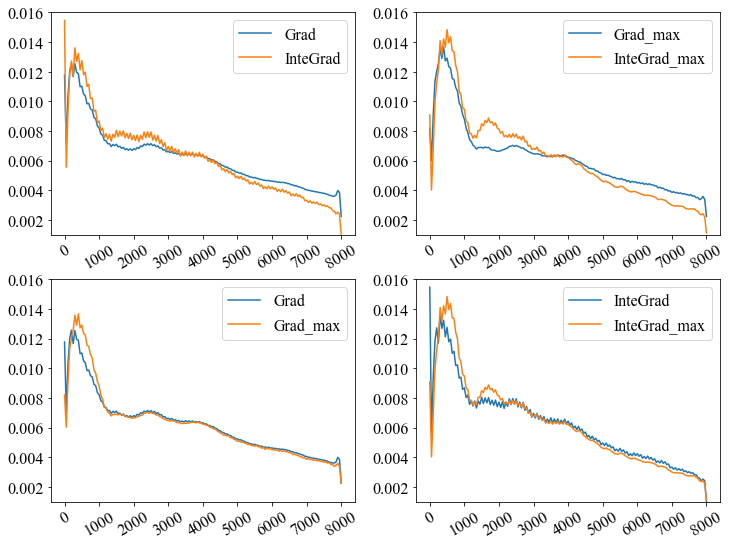

In [39]:
plt.figure(figsize=(12, 9))
plt.rc('font', family='Times New Roman')
# plt.title('Gradient Distributions', fontsize=22)
plt.xlabel('Frequency (Hz)', fontsize=24)
plt.ylabel('Weight', fontsize=24)

xnew = np.linspace(0, 8000, 161)

ax = plt.subplot(2, 2, 1)
# ax.set_title('(a)', fontsize=16)
plt.xticks(fontsize=16, rotation=30)
plt.yticks(fontsize=16)

plt.plot(xnew, grad)
plt.plot(xnew, ingrad)
plt.ylim(0.001, 0.016)

plt.legend(['Grad', 'InteGrad'], fontsize=16)

ax = plt.subplot(2, 2, 2)
# ax.set_title('(b)', fontsize=16)

plt.xticks(fontsize=16, rotation=30)
plt.yticks(fontsize=16)

plt.plot(xnew, grad_max)
plt.plot(xnew, ingrad_max)
plt.ylim(0.001, 0.016)

plt.legend(['Grad_max', 'InteGrad_max'], fontsize=16)


ax = plt.subplot(2, 2, 3)
# ax.set_title('(c)', fontsize=16)

plt.xticks(fontsize=16, rotation=30)
plt.yticks(fontsize=16)

plt.plot(xnew, grad)
plt.plot(xnew, grad_max)
plt.ylim(0.001, 0.016)

plt.legend(['Grad', 'Grad_max'], fontsize=16)

ax = plt.subplot(2, 2, 4)
# ax.set_title('(d)', fontsize=16)

plt.xticks(fontsize=16, rotation=30)
plt.yticks(fontsize=16)

plt.plot(xnew, ingrad)
plt.plot(xnew, ingrad_max)
plt.ylim(0.001, 0.016)

plt.legend(['InteGrad', 'InteGrad_max'], fontsize=16)